In [62]:
# load libraries 

from scipy.ndimage import center_of_mass
from helper_functions import isolate_dart_tip
from dartboard_images import DartboardImage
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# get current dir

#cur_dir = os.path.dirname(os.path.realpath(__file__))
cur_dir = os.getcwd()
parent_dir = os.path.dirname(cur_dir)
print(cur_dir)
print(parent_dir)

/Users/zach/Desktop/SDP/SmokingDartsv2/core
/Users/zach/Desktop/SDP/SmokingDartsv2


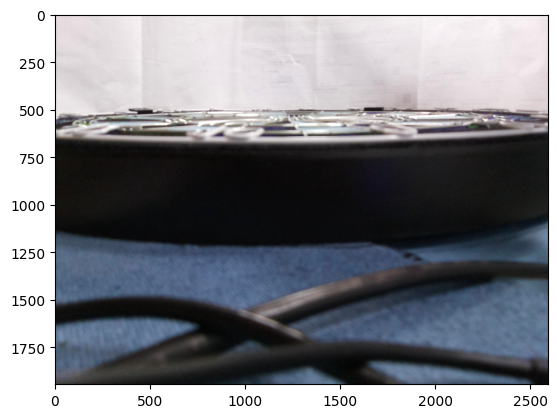

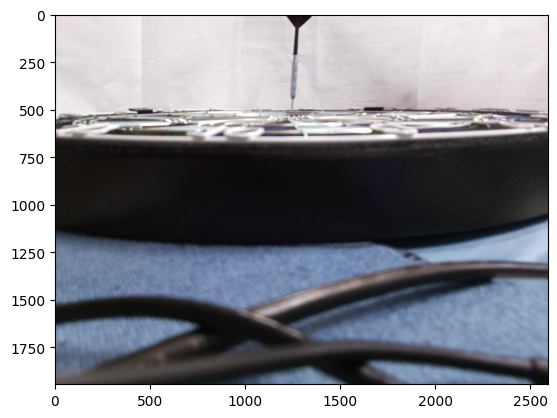

In [77]:
# load images
nodart = cv2.imread(os.path.join(parent_dir, 'images', '25.jpg'))
dart = cv2.imread(os.path.join(parent_dir, 'images', '30.jpg'))

# display images
plt.imshow(nodart)
plt.show()
plt.imshow(dart)
plt.show()

Dart tip coordinates:  1247.15 475.5


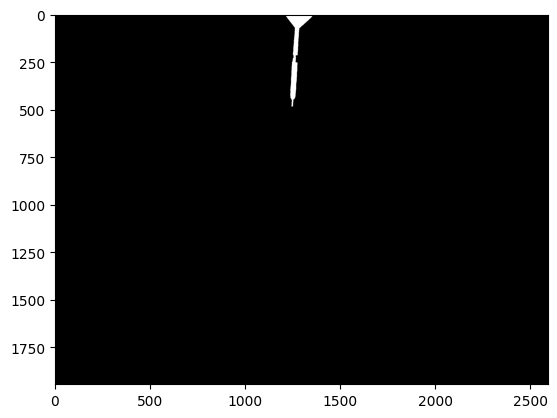

In [79]:

# dartboard image
db = DartboardImage("x", dart, last_img=nodart)
diff = db.get_diff_to_last_img()

# set bottom 3/4 of image to 0
diff[diff.shape[0]//4:, :] = 0

# opencv dilation
kernel = np.ones((5,5),np.uint8)
diff = cv2.dilate(diff.astype('uint8'),kernel,iterations = 1)

# opencv erosion
kernel = np.ones((5,5),np.uint8)
diff = cv2.erode(diff.astype('uint8'),kernel,iterations = 1)

# get the tip
isolated_dart_tip = isolate_dart_tip(diff)
y_coordinate, x_coordinate = center_of_mass(isolated_dart_tip)
print("Dart tip coordinates: ", x_coordinate, y_coordinate)

# show image diff
plt.imshow(diff, cmap='gray')
plt.show()

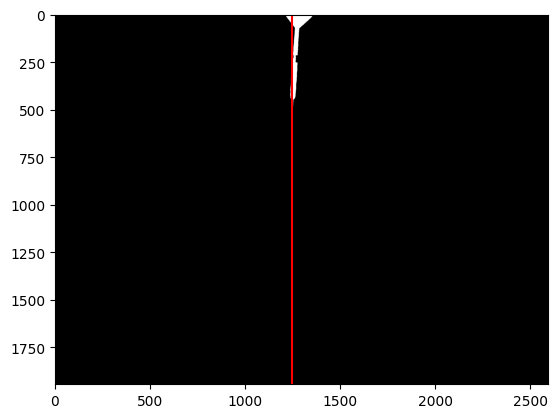

In [66]:
# draw a vertical lines through the dart tip overlaying the above image
plt.imshow(diff, cmap='gray')
plt.axvline(x=x_coordinate, color='r')
plt.show()

center_of_board = x_coordinate

Finding x-axis difference between center of board and dart tip from new image

Dart tip:  412.2495126705653
Center of Board:  1247.15
Distance from tip to COB:  834.9004873294348


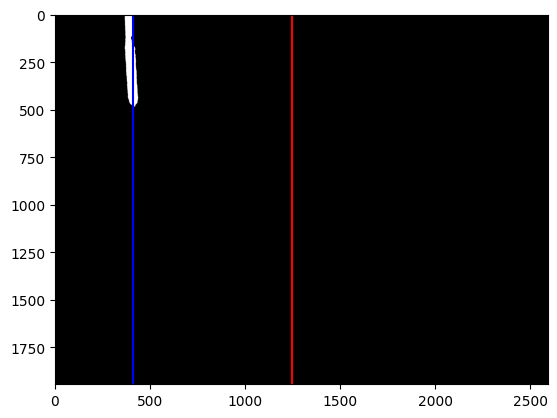

In [90]:
# load and display image
dart1 = cv2.imread(os.path.join(parent_dir, 'images', '22.jpg'))

# dartboard image
db = DartboardImage("x", dart1, last_img=nodart)
diff1 = db.get_diff_to_last_img()
# plt.imshow(diff1)
# plt.show()

# set bottom 3/4 of image to 0
diff1[diff1.shape[0]//4:, :] = 0

# opencv dilation
kernel = np.ones((5,5),np.uint8)
diff1 = cv2.dilate(diff1.astype('uint8'),kernel,iterations = 1)

# opencv erosion
kernel = np.ones((5,5),np.uint8)
diff1 = cv2.erode(diff1.astype('uint8'),kernel,iterations = 1)

# get the tip
isolated_dart_tip = isolate_dart_tip(diff1)
y_coordinate, x_coordinate = center_of_mass(isolated_dart_tip)
print("Dart tip: ", x_coordinate)
print("Center of Board: ", center_of_board)
print("Distance from tip to COB: ", abs(x_coordinate - center_of_board))

# show image diff
plt.imshow(diff1, cmap='gray')
plt.axvline(x=x_coordinate, color='b')
plt.axvline(x=center_of_board, color='r')
plt.show()

Adding hypothetical boundaries representing scoring areas to the image

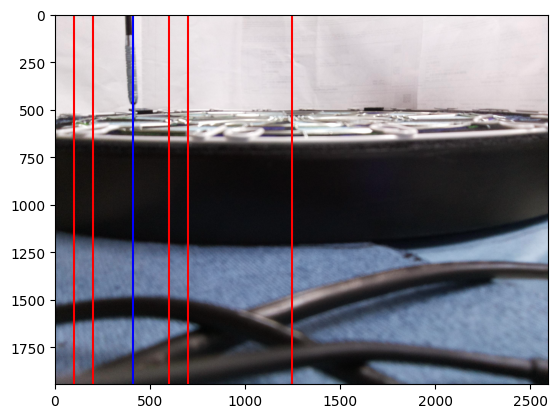

In [113]:
# load and display image
dart1 = cv2.imread(os.path.join(parent_dir, 'images', '22.jpg'))
plt.imshow(dart1, cmap='gray')
plt.axvline(x=x_coordinate, color='b')
plt.axvline(x=center_of_board, color='r')

edges_on_board = [100, 200, 600, 700]
for edge in edges_on_board:
    plt.axvline(x=edge, color='r')

plt.show()